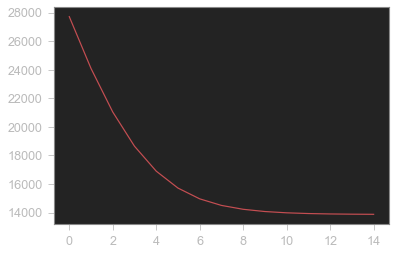

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

class NN:
    def __init__(self,folder,architecture,alpha): 
        self.X_train = []
        self.Y_train = []
        self.X_test = []
        self.Y_test = []
        self.data = [self.X_train,self.Y_train,self.X_test,self.Y_test]
        self.data_strings = ['X_train','Y_train','X_test','Y_test']
        self.folder = folder
        self.architecture = architecture
        self.weights = []
        self.activations = []
        self.alpha = alpha
        self.Error = []
    
    def load_data(self):
        '''  Run initially to save images as matrices

        for filename in os.listdir(self.folder):
            img = cv2.imread(os.path.join(self.folder,filename),0)
            img = cv2.resize(img,(50,50),interpolation = cv2.INTER_AREA)                
            self.data[0].append(img)
            self.data[1].append(0) if filename[0]=='c' else self.data[1].append(1)    
        
        indices = np.arange(len(self.data[0]))
        np.random.shuffle(indices)
        self.data[0] = np.asarray(self.data[0])[indices]
        self.data[1] = np.asarray(self.data[1])[indices]
        self.data[2] = np.asarray([None])
        self.data[3] = np.asarray([None])
        
        self.data[2] = self.data[0][-int(0.2*len(self.data[0])):]
        self.data[3] = self.data[1][-int(0.2*len(self.data[1])):]
        self.data[0] = self.data[0][0:int(0.8*len(self.data[0]))]
        self.data[1] = self.data[1][0:int(0.8*len(self.data[1]))]

        for i in range(4):
            np.save(self.data_strings[i]+'.npy', self.data[i])
                
#         '''
        
        for i in range(4):
            file = self.data_strings[i] + '.npy'
            self.data[i].append(np.load(file))
            self.data[i] = np.asarray(self.data[i])
        
        self.data[0] = self.data[0].reshape(-1,len(self.data[0][0][0])**2)
        self.data[2] = self.data[2].reshape(-1,len(self.data[2][0][0])**2)
        self.data[1] = self.data[1].reshape(-1,1)
        self.data[3] = self.data[3].reshape(-1,1)
                
        self.initialise_weights()
        

    def initialise_weights(self):
        for i in range(len(self.architecture)-1):
            w_one_layer = []
            for j in range(self.architecture[i+1][0]):
                w = 0.05*np.random.rand(self.architecture[i][0])
                w_one_layer.append(w)
            self.weights.append(np.asarray(w_one_layer))
        
    def feedforward(self):
        self.activations = [self.data[0]]
        z = self.data[0]
            
        for i in range(len(self.architecture)-1):
            X_curr,W_curr = z,self.weights[i]
            a = np.dot(X_curr,W_curr.T)
            self.activations.append(a)
            z = self.apply_activation(a,self.architecture[i+1][1])
            
        self.compute_error(z,self.data[1])
        
    def apply_activation(self,a,kind):
        if(kind=='sigmoid'): return 1/(1+np.exp(-a))  
        elif(kind=='tanh'): return np.tanh(a)
        else: return a
    
    def derivative(self,x,kind):
        if(kind=='sigmoid'): return self.apply_activation(x,kind)*(1-self.apply_activation(x,kind))  
        else: return 1-self.apply_activation(x,'')**2
    
    def compute_error(self,y_pred,y_actual):
        y_pred[y_pred > 0.9999] = 1 - 1e-6
        y_pred[y_pred < 0.0001] = 1e-6
        e = - y_actual*np.log(y_pred) - (1-y_actual)*np.log(1-y_pred)
        self.Error.append(np.sum(e)) 
        delta = self.derivative(self.activations[-1],self.architecture[-1][1])*(y_pred-y_actual)/(y_pred*(1-y_pred))
        z = self.apply_activation(self.activations[1],self.architecture[1][1])
        self.backprop(delta,z,len(self.architecture)-1)
        
    def backprop(self,delta,z,w_layer):
        grad = np.dot(delta.T,z)
        self.weights[w_layer-1] =  self.weights[w_layer-1] - self.alpha*grad
        if(w_layer==1): return
        w_layer = w_layer - 1
        q = self.derivative(self.activations[w_layer],self.architecture[w_layer][1])
        t = delta*self.weights[w_layer]
        delta = self.derivative(self.activations[w_layer],self.architecture[w_layer][1])*(delta*self.weights[w_layer])
        z = self.apply_activation(self.activations[w_layer-1],self.architecture[w_layer-1][1])
        self.backprop(delta,z,w_layer)
        
    def train(self,iterations):
        self.load_data()     
        for it in range(iterations):
            self.feedforward()
                
folder = r"D:\Work\Data\ML\NN\dogs_cats\train_grey_crop"
architecture = [[2500,'unity'],[100,'sigmoid'],[1,'sigmoid']]
iterations = 15
alpha = 5*1e-7
nn = NN(folder,architecture,alpha)
nn.train(iterations)
plt.plot(nn.Error,'r')
plt.show()